In [3]:
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import functools

In [4]:
# load csv files into dataframes
# the paramaters low_memory=False, dtype=str tell pandas not to guess the datatype
# and make everything a string
# note: many posts say low_memory=False doesn't do anything ... 
df_patients = pds.read_csv('patients.csv', low_memory=False, dtype=str, encoding='utf-8')
df_patients_teeth = pds.read_csv('patient_teeth.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_caries = pds.read_csv('tooth_caries.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_surface_caries = pds.read_csv('tooth_surface_caries.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_procedures = pds.read_csv('tooth_procedures_no_es.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_surface_procedures = pds.read_csv('tooth_surface_procedures_no_es.csv', low_memory=False, dtype=str, encoding='utf-8')

In [5]:
# drop duplicates from dataframes
df_patients.drop_duplicates(inplace=True)
df_patients_teeth.drop_duplicates(inplace=True)
df_tooth_caries.drop_duplicates(inplace=True)
df_tooth_surface_caries.drop_duplicates(inplace=True)
df_tooth_procedures.drop_duplicates(inplace=True)
df_tooth_surface_procedures.drop_duplicates(inplace=True)

In [4]:
# testing output
# df_patients.head() # good
# df_patients_teeth.head() # good
# df_tooth_caries.head() # good
# df_tooth_surface_caries.head() # good
# df_tooth_procedures.head() # good
# df_tooth_surface_procedures.head() # good

In [6]:
len(df_patients) # 229,414

229414

In [7]:
len(df_patients_teeth) # 1,231,726

1234891

In [39]:
# print number of patients
# alternative method: df_patients.count() # 229,414
# len(df_patients) # simplier -> 229,414

# get counts of genders
group = df_patients.gender.value_counts()
group
temp_df = pds.DataFrame(group)
temp_df.loc['total'] = len(df_patients)
temp_df

,gender
female,128026
male,101388
total,229414


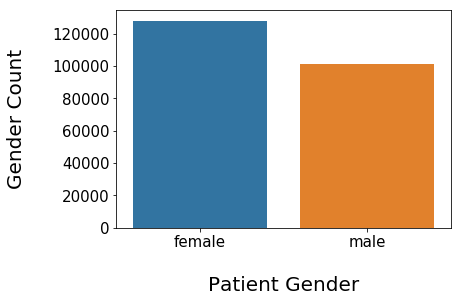

In [9]:
# plot gender counts
# ax = sns.countplot(x="gender", data=group)
ax = sns.barplot(x=group.index, y=group.values)
ax.set_xlabel("\nPatient Gender", size=20)
ax.set_ylabel("Gender Count\n", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [10]:
# merge, patients, teeth data frames
df_teeth = pds.merge(df_patients, df_patients_teeth, \
                             how='inner', on=['patient_id'])
df_teeth.drop_duplicates(inplace=True)
# df_teeth.head()

In [12]:
# len(df_teeth) 
# len(df_patients_teeth) 

1234891

In [13]:
# merge teeth and procedures data frames
temp = df_tooth_procedures[df_tooth_procedures.tooth_id.isin(df_teeth.tooth_id)]
# len(df_tooth_procedures) # 1,681,694
# len(temp) # 1,675,416

df_procedures = pds.merge(df_teeth, temp, how='left', on=['tooth_id', 'tooth_num'])
len(df_procedures) 
# df_procedures.head()

1696526

In [14]:
# merge procedures with surface information
# this final dataset will be the 'observations' dataset
temp = df_tooth_surface_procedures[df_tooth_surface_procedures.event_id.isin(df_procedures.event_id)]
# len(df_tooth_surface_procedures) # 1,245,022
# len(temp) # 1,241,352

df_obs = pds.merge(df_procedures, temp, how='left', on=['event_id', 'tooth_id', 'tooth_num'])
len(df_obs)

1696526

In [13]:
df_extracted = df_obs[df_obs.extract_date.notnull()][['tooth_id','tooth_num']]
# df_extracted = df_obs[df_obs.extract_date.notna()][['tooth_id','tooth_num']]
df_extracted.tooth_num = pds.to_numeric(df_extracted.tooth_num)
df_extracted.drop_duplicates(inplace=True)
# df_extracted.head()
# df_extracted.groupby('tooth_num').count()
# len(df_extracted) # isnull -> 1,617,783; isna -> 1,617,783; notnull -> 41,331; notna -> 41,331

In [14]:
temp1 = df_obs[['tooth_num', 'tooth_id', 'extract_date']] #.fillna(0)
len(temp1)
# temp2 = temp1[temp1.extract_date == 0]
# temp2 = temp1.query("extract_date != extract_date")
temp2 = temp1[temp1.extract_date.notnull()]
# temp2.drop_duplicates(inplace=True)
temp3 = temp2[['tooth_num', 'tooth_id']]
print(len(temp3))
# temp3.groupby('tooth_num').size()
temp3.drop_duplicates(inplace=True)
# temp3.tooth_num.value_counts()
# print(len(temp3))
# temp2.head()
# temp3.groupby('tooth_num').size()
# temp2.tooth_num.value_counts()
# temp3 = temp2.query("tooth_num == '1'")
# temp3.drop_duplicates(inplace=True)
# print(len(temp3))

89804


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [15]:
# temp4 = temp3.query("tooth_num == '1'")
# temp4.head()

In [16]:
# print column names for easy reference
print(df_obs.columns)

Index(['practice', 'patient_id', 'gender', 'dob', 'first_visit', 'last_visit',
       'tooth_id', 'tooth_num', 'first_PCR', 'first_RCT', 'extract_date',
       'missing_date', 'event_id', 'event_name', 'event_date', 'ada_code', 'm',
       'o', 'd', 'b', 'l', 'f', 'i'],
      dtype='object')


In [17]:
# convert columns to datetime datatype (in case they aren't stored as datetimes)
df_obs.dob = pds.to_datetime(df_obs.dob)
df_obs.first_visit = pds.to_datetime(df_obs.first_visit, errors = 'coerce')
df_obs.last_visit = pds.to_datetime(df_obs.last_visit, errors = 'coerce')
df_obs.first_PCR = pds.to_datetime(df_obs.first_PCR, errors = 'coerce')
df_obs.first_RCT = pds.to_datetime(df_obs.first_RCT, errors = 'coerce')
df_obs.event_date = pds.to_datetime(df_obs.event_date, errors = 'coerce')
df_obs.extract_date = pds.to_datetime(df_obs.extract_date, errors = 'coerce')
df_obs.missing_date = pds.to_datetime(df_obs.missing_date, errors = 'coerce')

# df_obs.head()

In [18]:
# add patient ages to observations (using year 2017)
df_obs['patient_age'] = 2017 - pds.to_datetime(df_obs.dob).dt.year

# df_obs[['dob', 'patient_age']].head()

In [19]:
# some of the patient ages are less than zero due to bad DOB data
# let's drop the records
df_obs = pds.DataFrame(df_obs.query('patient_age > 0'))

# df_obs[['dob', 'patient_age']].head()
# df_obs.head()

In [20]:
# df_teeth.tooth_num.count()
# df_teeth.groupby('tooth_num').count()

# temp = df_teeth[~np.isnat(df_teeth.extract_date)]
# temp = df_teeth[~df_teeth.extract_date.isnull()]
# temp = temp.query("tooth_num == '7'")
# temp.groupby('tooth_num').count()
# temp.head()

In [21]:
# create dataframe of patient demographics
# note the use of drop_duplicates so that we have distict patients
df_demographics = df_obs[['practice', 'patient_id', 'gender', 'dob', 'patient_age']].drop_duplicates()

# df_demographics.head()

In [22]:
# create separate dataframes for genders
# there is probably a better way to do this ...
df_females = df_demographics.query("gender == 'female'")[['gender', 'patient_age']]
df_males = df_demographics.query("gender == 'male'")[['gender', 'patient_age']]

# testing output
# df_females.head()
# print(len(df_females))
# df_females.groupby('patient_age').count()

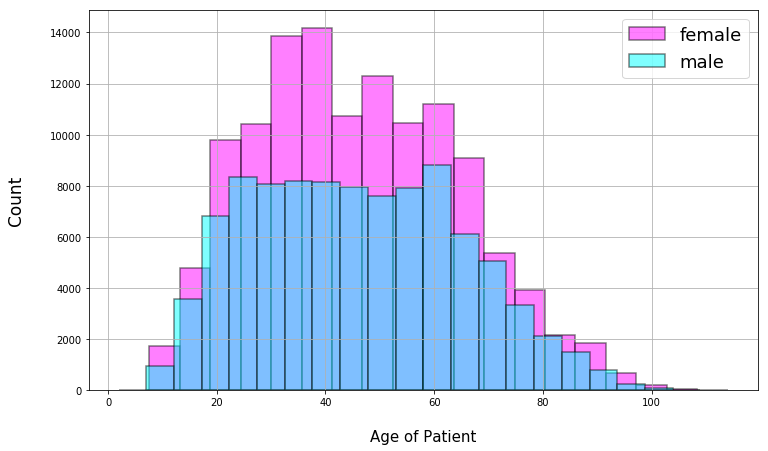

In [23]:
# plot age/gender distribution
ax = df_females["patient_age"]\
        .hist(bins=20, alpha=0.5, color='magenta', label='female', edgecolor='black', linewidth=1.5,figsize=(12,7))
ax = df_males["patient_age"]\
        .hist(bins=20, alpha=0.5, color='cyan', label='male', edgecolor='black', linewidth=1.5, figsize=(12,7))

ax.set_xlabel("\nAge of Patient", fontsize=15)
ax.set_ylabel("Count\n", fontsize=17)

plt.legend(loc='upper right', prop={'size': 18})
plt.show()

In [26]:
# build dataframe of restorations on surfaces
df_fillings = df_obs[['tooth_id', 'tooth_num', 'ada_code', 'event_name', 'm','o', 'd', 'b', 'l', 'f', 'i']]
# df_fillings = df_fillings.query(""" \
#                     ada_code.str.startswith('D') \
#                     and event_name.str.contains('filling') \
#                     and (m==1 or o==1 or d==1 or b==1 or l==1 or f==1 or i==1)"""
#                     , engine="python") # engine="python" is needed for str functions to work
# df_fillings = df_fillings.query(""" m==1 or o==1 or d==1 or b==1 or l==1 or f==1 or i==1"""
#                                     , engine="python") # engine="python" is needed for str functions to work
df_fillings.m = pds.to_numeric(df_fillings.m)
df_fillings.o = pds.to_numeric(df_fillings.o)
df_fillings.d = pds.to_numeric(df_fillings.d)
df_fillings.b = pds.to_numeric(df_fillings.b)
df_fillings.l = pds.to_numeric(df_fillings.l)
df_fillings.f = pds.to_numeric(df_fillings.f)
df_fillings.i = pds.to_numeric(df_fillings.i)
# df_fillings.head()

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
# add column with number of surfaces restored during procedure
df_fillings['num_restored_surfaces'] = df_fillings.m + df_fillings.o + df_fillings.d \
                                       + df_fillings.b + df_fillings.l + df_fillings.f + df_fillings.i

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
df_fillings.num_restored_surfaces = pds.to_numeric(df_fillings.num_restored_surfaces)
df_fillings = df_fillings[df_fillings.num_restored_surfaces > 0]
# df_fillings.head()

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
# df_fillings.head()

In [30]:
# find number of procedures per tooth
# tooth_counts = pds.DataFrame(df_fillings.groupby('tooth_num')['tooth_num'].count())
tooth_counts = df_fillings.groupby('tooth_num')['tooth_num'].count()
# tooth_counts['num_int'] = tooth_counts.
tooth_counts.columns = ['count']
tooth_counts.index = pds.to_numeric(tooth_counts.index)
tooth_counts.sort_index(inplace=True) # sort data by tooth number 1 -> 32
# tooth_counts

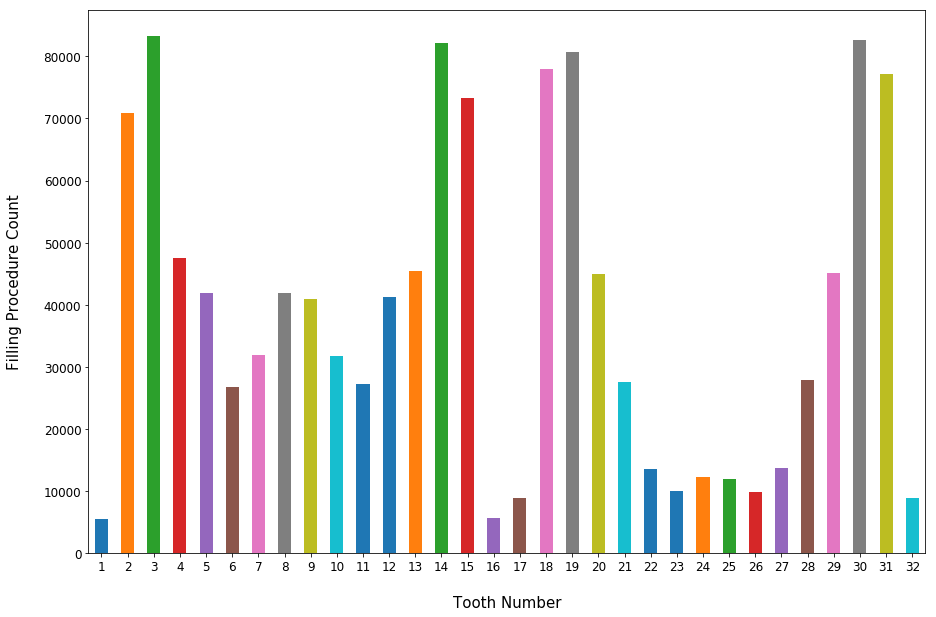

In [31]:
%matplotlib inline
# draw bar chart showing the number of procedures performed on each tooth (number)
ax = tooth_counts.plot.bar(figsize=(15,10)) 

# rotate the ticks on the x axis
plt.xticks(rotation=0)

# configure labels
# note the use of '\n' to create space between ticks and labels
ax.set_xlabel("\nTooth Number", fontsize=15)
ax.set_ylabel("Filling Procedure Count\n", fontsize=15)
ax.tick_params(labelsize='large')

plt.show()

In [30]:
# build dataframe of teeth that have been extracted
# note the use of engine="python"
# df_extracted = df_obs[df_obs.extract_date.notnull()]
df_extracted = df_obs[~np.isnat(df_obs.extract_date)][['tooth_id','tooth_num','extract_date']]
# df_extracted = df_obs[~np.isnat(df_obs.extract_date)][['tooth_id','tooth_num']]
df_extracted.tooth_num = pds.to_numeric(df_extracted.tooth_num)
df_extracted.drop_duplicates(inplace=True)
df_extracted.head()

,tooth_id,tooth_num,extract_date
18,A_1_1_155_30,30,2009-12-02
31,A_1_1_329_4,4,2004-04-30
54,A_1_1_551_12,12,2014-07-07
122,A_1_1_3529_2,2,2008-04-26
130,A_1_1_3529_30,30,2014-10-18


In [31]:
# query results from triplestore
df_tooth1 = pds.read_csv('extracted_tooth_1_no_es.csv')
df_tooth1.drop_duplicates(inplace=True)
# df_tooth1.head()

In [32]:
df_tooth1.tooth_num.value_counts()

1    954
Name: tooth_num, dtype: int64

In [33]:
# extract = df_obs[df_obs.tooth_id.isin(df_tooth1.tooth_id)][['tooth_id','tooth_num', 'extract_date']]
temp = df_obs.query("tooth_num == '1'")
extract = temp[df_obs.extract_date.notnull()][['tooth_id','tooth_num', 'extract_date']]
extract.drop_duplicates(inplace=True)
# extract.head()

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
extract.tooth_num.value_counts()

1    954
Name: tooth_num, dtype: int64

In [35]:
# extract.extract_date.unique()

In [36]:
extract2 = extract.drop_duplicates()
extract2.tooth_num.value_counts()

1    954
Name: tooth_num, dtype: int64

In [37]:
extract3 = extract[['tooth_id','tooth_num']].drop_duplicates()
extract3.tooth_num.value_counts()

1    953
Name: tooth_num, dtype: int64

In [38]:
# extract.extract_date.unique()

In [39]:
# extract[extract.extract_date.notnull()]['extract_date'].unique()

In [40]:
# temp = df_extracted[~df_extracted.tooth_id.isin(extract.tooth_id)]
# temp
# temp.tooth_num.value_counts()

In [41]:
tooth_counts = df_extracted.groupby('tooth_num').size()
# tooth_counts

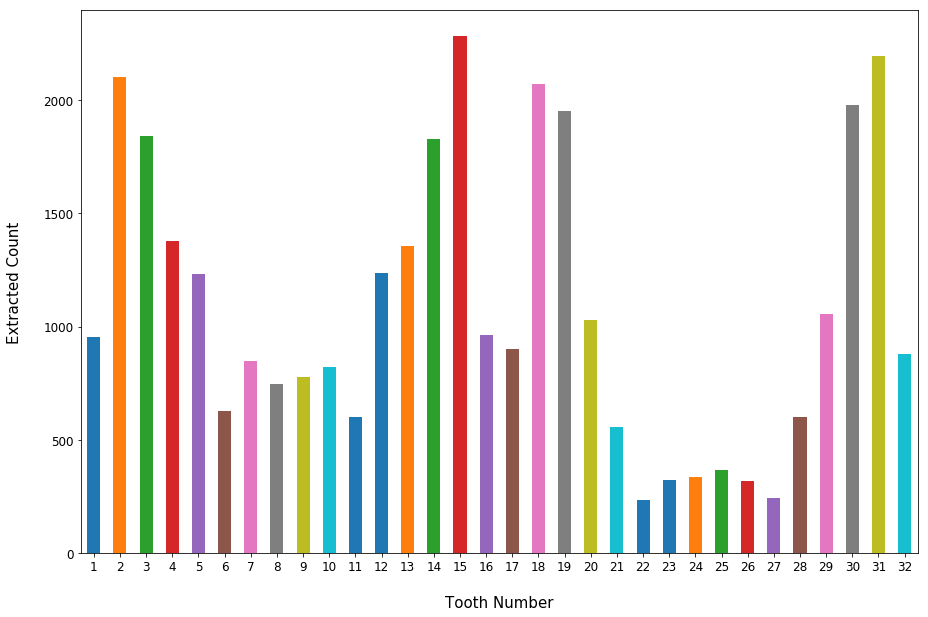

In [42]:
# plot extracted teeth according to tooth number
ax = tooth_counts.plot.bar(figsize=(15,10)) 

# rotate the ticks on the x axis
plt.xticks(rotation=0)

# configure labels
# note the use of '\n' to create space between ticks and labels
ax.set_xlabel("\nTooth Number", fontsize=15)
ax.set_ylabel("Extracted Count\n", fontsize=15)
ax.tick_params(labelsize='large')

plt.show()

In [43]:
# build dataframe of teeth that have been found missing
# note the use of engine="python"
df_missing = df_obs[df_obs.missing_date.notnull()]
# df_missing.tooth_num = pds.to_numeric(df_extracted.tooth_num)
df_missing.tooth_num = df_missing.tooth_num.astype(int)


/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [44]:
tooth_counts =df_missing.groupby('tooth_num').size()
# tooth_counts

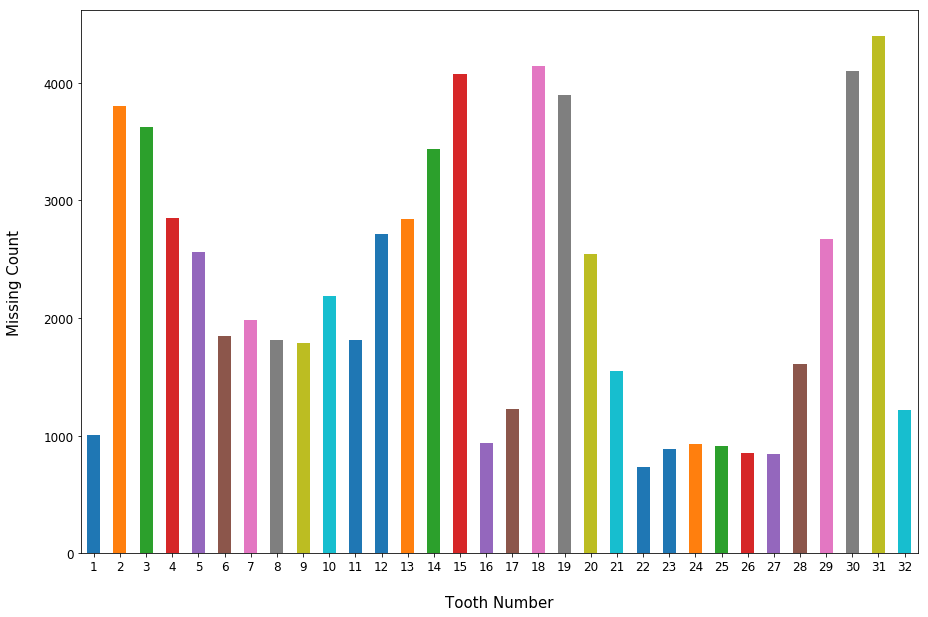

In [45]:
# plot missing teeth according to tooth number
ax = tooth_counts.plot.bar(figsize=(15,10)) 

# rotate the ticks on the x axis
plt.xticks(rotation=0)

# configure labels
# note the use of '\n' to create space between ticks and labels
ax.set_xlabel("\nTooth Number", fontsize=15)
ax.set_ylabel("Missing Count\n", fontsize=15)
ax.tick_params(labelsize='large')

plt.show()

In [46]:
def missing_flag_by_row(row):
    if pds.notnull(row['extract_date']) or pds.notnull(row['missing_date']):
        return 1
    else:
        return 0

def pcr_flag_by_row(row):
    if pds.notnull(row['extract_date']) or pds.notnull(row['missing_date']):
        return 1
    else:
        return 0

def pcr_flag_by_columns(extract_date, missing_date):
    if pds.notnull(extract_date) or pds.notnull(missing_date):
        return 1
    else:
        return 0

def pcr_flag_by_df(df):
    if pds.notnull(df.extract_date) or pds.notnull(df.missing_date):
        df['PCR_flag'] = 1
    else:
        df['PCR_flag'] = 0

# temp = df_obs.iloc[:100000, :]
temp = df_obs
temp['missing_flag'] = temp.apply(missing_flag_by_row, axis=1)

df_missing = temp[temp.missing_flag == 1]
# temp[['extract_date', 'missing_date', 'missing_flag']][temp.missing_flag == 0].head()

In [47]:
df_missing[df_missing.missing_flag == 0].head() # should be none ...

,practice,patient_id,gender,dob,first_visit,last_visit,tooth_id,tooth_num,first_PCR,first_RCT,...,ada_code,m,o,d,b,l,f,i,patient_age,missing_flag


In [48]:
# create dataframe of only suface info
df_surfaces = df_fillings[['m', 'o', 'd', 'b', 'l', 'f', 'i', 'num_restored_surfaces']]

# df_surfaces.head()

In [49]:
# calc number of surfaces restored for each surface
# note we are ignoring the number of restored surfaces (for now)
surface_counts = df_surfaces[['m', 'o', 'd', 'b', 'l', 'f', 'i']].apply(sum)

# surface_counts

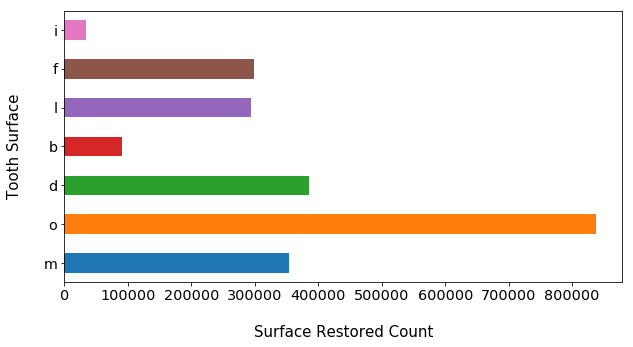

In [50]:
# create bar chart (flipped on its side) to show number of restorations per service
ax = surface_counts.plot.barh(figsize=(10,5))

# configure labels
ax.set_xlabel("\nSurface Restored Count", fontsize=15)
ax.set_ylabel("Tooth Surface\n", fontsize=15)
ax.tick_params(labelsize='x-large')

plt.show()

In [51]:
# calc number of surfaces restored on a tooth for each procedure (i.e., number of surfaces filled during procedure)
temp = pds.DataFrame(df_fillings[['tooth_num', 'num_restored_surfaces']]\
                        .groupby(['num_restored_surfaces', 'tooth_num']).size())

# temp.head()

In [52]:
# note the use of fill_values for NaN
restored_surface_counts = temp.unstack('num_restored_surfaces', fill_value=0)
restored_surface_counts.columns = ['1', '2', '3', '4', '5', '6']

# restored_surface_counts

In [53]:
# do some checks
# df_fillings.query('tooth_num == 32 and num_restored_surfaces == 5')['num_restored_surfaces'].count() # matches
# df_fillings.query('tooth_num == 30 and num_restored_surfaces == 5')['num_restored_surfaces'].count() # matches
# df_fillings.query('tooth_num == 20 and num_restored_surfaces == 2')['num_restored_surfaces'].count() # matches

In [54]:
# make simple plot of counts
# first do a check, and note that there are only 3 restorations of 6 surfaces (which seems not possible)
# the heatmap also reflects this ...
counts_per_surface = pds.DataFrame(restored_surface_counts.apply(sum))

# set index and column name
counts_per_surface.index.name = 'num_surfaces_restored'
counts_per_surface.columns = ['count']

# counts_per_surface

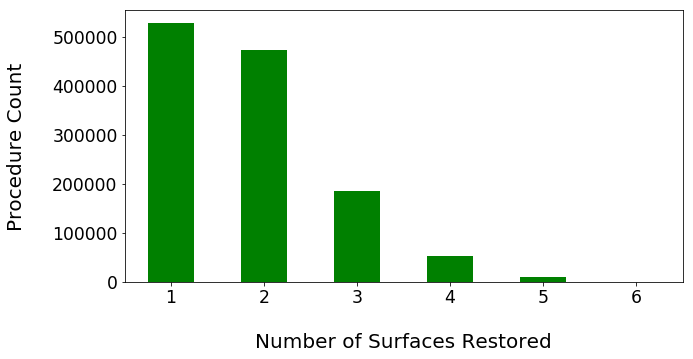

In [55]:
ax = counts_per_surface.plot.bar(figsize=(10,5), color='green', legend=False)

# configure X and Y labels
ax.set_xlabel("\nNumber of Surfaces Restored", fontsize=20)
ax.set_ylabel("Procedure Count\n", fontsize=20)
ax.tick_params(labelsize='xx-large')

# rotate the ticks on the x axis
plt.xticks(rotation=0)

plt.show()

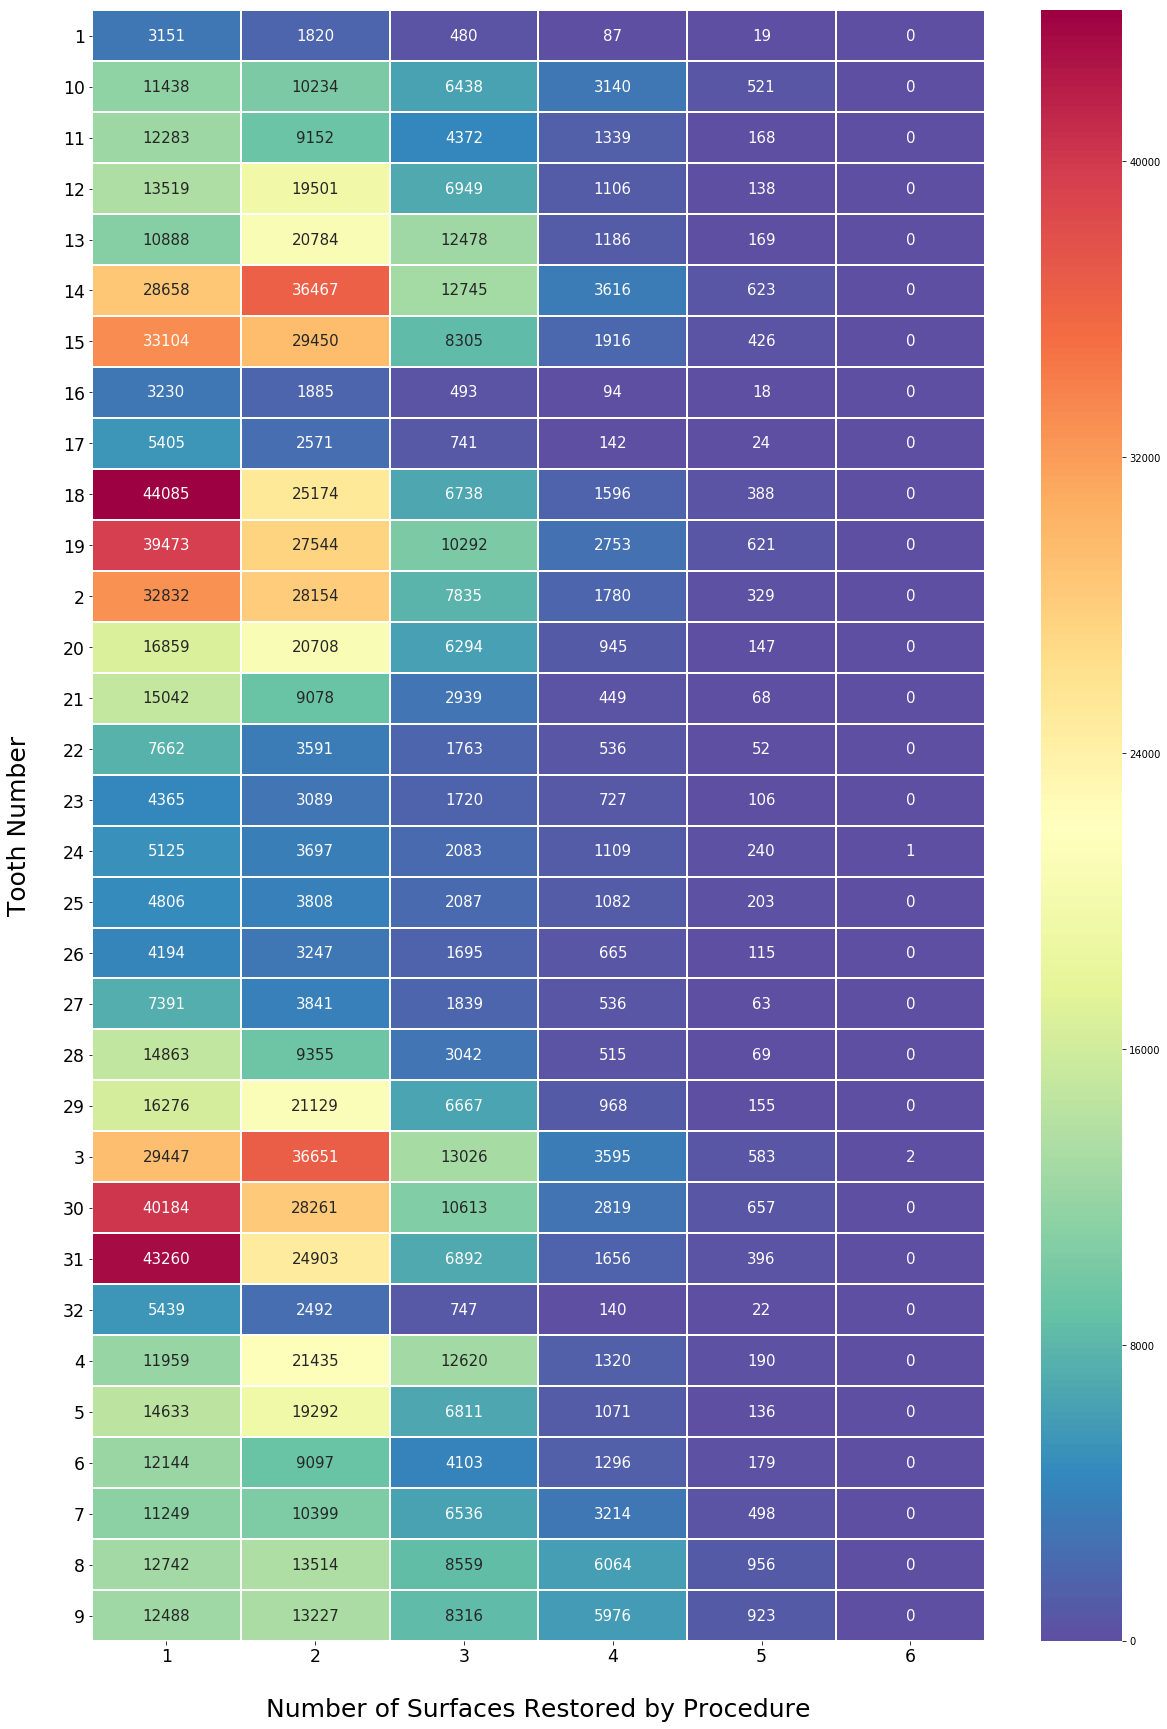

In [56]:
plt.figure(figsize = (20,30)) # this sets width and height of the figure

# fmt='d' means annotations are digits, annot_kws={"size":15} sets the size of the annotation font
ax = sns.heatmap(restored_surface_counts, cmap='Spectral_r', linewidths=1.0, annot=True, fmt='d', annot_kws={"size":15})

# rotate the ticks on the y axis
plt.yticks(rotation=0)

# configure X and Y labels
ax.set_ylabel("Tooth Number\n", fontsize=25)
ax.set_xlabel("\nNumber of Surfaces Restored by Procedure", fontsize=25)
ax.tick_params(labelsize='xx-large')

plt.show()

In [15]:
# add some meta information about teeth
# tooth_info = pds.read_csv("tooth_numbers_and_labels.csv")
# tooth_info

In [17]:
# # add meta info about tooth type and region in mouth
# posterior_tooth = [1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 28, 29, 30, 31, 32]
# anterior_tooth = [6, 7, 8, 9, 10, 11, 22, 23, 24, 25, 26, 27]

# tooth_info['molar'] =  tooth_info.tooth_label.map(lambda label: 1 if " molar " in label else 0)
# tooth_info['premolar'] =  tooth_info.tooth_label.map(lambda label: 1 if " premolar " in label else 0)
# tooth_info['canine'] =  tooth_info.tooth_label.map(lambda label: 1 if " canine " in label else 0)
# tooth_info['incisor'] =  tooth_info.tooth_label.map(lambda label: 1 if " incisor " in label else 0)
# tooth_info['upper'] =  tooth_info.tooth_label.map(lambda label: 1 if " upper " in label else 0)
# tooth_info['lower'] =  tooth_info.tooth_label.map(lambda label: 1 if " lower " in label else 0)
# tooth_info['right'] =  tooth_info.tooth_label.map(lambda label: 1 if "Right " in label else 0)
# tooth_info['right upper'] =  tooth_info.tooth_label.map(lambda label: 1 if "Right upper " in label else 0)
# tooth_info['right lower'] =  tooth_info.tooth_label.map(lambda label: 1 if "Right lower " in label else 0)
# tooth_info['left'] =  tooth_info.tooth_label.map(lambda label: 1 if "Left " in label else 0)
# tooth_info['left upper'] =  tooth_info.tooth_label.map(lambda label: 1 if "Left upper " in label else 0)
# tooth_info['left lower'] =  tooth_info.tooth_label.map(lambda label: 1 if "Left lower " in label else 0)
# tooth_info['posterior'] = tooth_info.tooth.map(lambda tooth: 1 if tooth in posterior_tooth else 0)
# tooth_info['anterior'] = tooth_info.tooth.map(lambda tooth: 1 if tooth in anterior_tooth else 0)

# ########### molars by mouth region
# tooth_info['right upper molar'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Right upper " in label and " molar " in label else 0)
# tooth_info['left upper molar'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Left upper " in label and " molar " in label else 0)

# tooth_info['right lower molar'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Right lower " in label and " molar " in label else 0)
# tooth_info['left lower molar'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Left lower " in label and " molar " in label else 0)

# ########### premolars by mouth region
# tooth_info['right upper premolar'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Right upper " in label and "premolar " in label else 0)
# tooth_info['left upper premolar'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Left upper " in label and "premolar " in label else 0)

# tooth_info['right lower premolar'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Right lower " in label and "premolar " in label else 0)
# tooth_info['left lower premolar'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Left lower " in label and "premolar " in label else 0)

# ########### canines by mouth region
# tooth_info['right upper canine'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Right upper " in label and "canine " in label else 0)
# tooth_info['left upper canine'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Left upper " in label and "canine " in label else 0)

# tooth_info['right lower canine'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Right lower " in label and "canine " in label else 0)
# tooth_info['left lower canine'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Left lower " in label and "canine " in label else 0)

# ########### incisors by mouth region
# tooth_info['right upper incisor'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Right upper " in label and "incisor " in label else 0)
# tooth_info['left upper incisor'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Left upper " in label and "incisor " in label else 0)

# tooth_info['right lower incisor'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Right lower " in label and "incisor " in label else 0)
# tooth_info['left lower incisor'] = \
#         tooth_info.tooth_label.map(lambda label: 1 if "Left lower " in label and "incisor " in label else 0)

# tooth_info[['tooth_label', 'right upper molar', 'left upper molar', 'right lower molar', 'left lower molar']]
# tooth_info[['tooth_label', 'right upper premolar', 'left upper premolar', 'right lower premolar', 'left lower premolar']]
# tooth_info[['tooth_label', 'right upper canine', 'left upper canine', 'right lower canine', 'left lower canine']]
# tooth_info[['tooth_label', 'right upper incisor', 'left upper incisor', 'right lower incisor', 'left lower incisor']]
# tooth_info

In [19]:
# tooth_info.to_csv("tooth_meta_info.csv", index=False) # save tooth info dataframe

In [22]:
tooth_info = pds.read_csv("tooth_meta_info.csv", index_col='tooth')
# tooth_info

In [148]:
# calc number of surfaces restored on a tooth for each procedure (i.e., number of surfaces filled during procedure)
temp = pds.DataFrame(df_fillings[['tooth_num', 'num_restored_surfaces']]\
                        .groupby(['num_restored_surfaces', 'tooth_num']).size())

temp.head()

0
num_restored_surfaces tooth_num       
1.0                   1           3151
                      10         11438
                      11         12283
                      12         13519
                      13         10888

In [84]:
# note the use of fill_values for NaN
restored_surface_counts = temp.unstack('num_restored_surfaces', fill_value=0)
restored_surface_counts.columns = ['1', '2', '3', '4', '5', '6']

restored_surface_counts

In [84]:
# restored_surface_counts.reset_index(inplace=True)

In [119]:
# restored_surface_counts

In [120]:
# for some reason the index gets named 'num_surfaces_restored', re-asserting the column names removes this
# restored_surface_counts.columns = ['tooth_num', '1', '2', '3', '4', '5', '6']

# this also works
# restored_surface_counts.columns.name = None

# restored_surface_counts

In [108]:
# change datatype of tooth num column to int
restored_surface_counts.tooth_num = restored_surface_counts.tooth_num.astype(int)

In [109]:
# resest the index so that indexes become column names 
# restored_surface_counts.reset_index(inplace=True)

In [147]:
restored_surface_counts = restored_surface_counts.merge(tooth_info, left_on='tooth_num', right_on='tooth', how='left')

In [32]:
# restored_surface_counts

In [122]:
incisor_surfaces = restored_surface_counts.query('incisor == 1')[['tooth_num', '1', '2', '3', '4', '5', '6']]
molar_surfaces = restored_surface_counts.query('molar == 1')[['tooth_num', '1', '2', '3', '4', '5', '6']]
canine_surfaces = restored_surface_counts.query('canine == 1')[['tooth_num', '1', '2', '3', '4', '5', '6']]
premolar_surfaces = restored_surface_counts.query('premolar == 1')[['tooth_num', '1', '2', '3', '4', '5', '6']]
upper_surfaces = restored_surface_counts.query('upper == 1')[['tooth_num', '1', '2', '3', '4', '5', '6']]
lower_surfaces = restored_surface_counts.query('lower == 1')[['tooth_num', '1', '2', '3', '4', '5', '6']]
right_surfaces = restored_surface_counts.query('right == 1')[['tooth_num', '1', '2', '3', '4', '5', '6']]
left_surfaces = restored_surface_counts.query('left == 1')[['tooth_num', '1', '2', '3', '4', '5', '6']]

In [123]:
canine_surfaces

,tooth_num,1,2,3,4,5,6
2,11,12283,9152,4372,1339,168,0
14,22,7662,3591,1763,536,52,0
19,27,7391,3841,1839,536,63,0
28,6,12144,9097,4103,1296,179,0


In [ ]:
# incisor_surface_counts

In [124]:
molar_surface_counts = molar_surfaces.set_index('tooth_num').sum().to_frame(name='molar')
premolar_surface_counts = premolar_surfaces.set_index('tooth_num').sum().to_frame(name='premolar')
canine_surface_counts = canine_surfaces.set_index('tooth_num').sum().to_frame(name='canine')
incisor_surface_counts = incisor_surfaces.set_index('tooth_num').sum().to_frame(name='incisor')

In [125]:
def join_dfs(ldf, rdf):
    return ldf.join(rdf, how='inner')

df_surface_counts = \
    functools.reduce(join_dfs, 
                     [molar_surface_counts, premolar_surface_counts, 
                      canine_surface_counts, incisor_surface_counts])

In [34]:
# df_counts

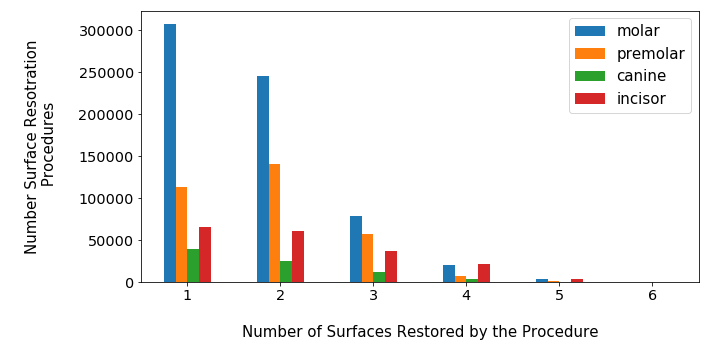

In [127]:
ax = df_surface_counts.plot.bar(figsize=(10,5))

# configure labels
ax.set_ylabel("\nNumber Surface Resotration\n Procedures\n", fontsize=15)
ax.set_xlabel("\nNumber of Surfaces Restored by the Procedure", fontsize=15)
ax.tick_params(labelsize='x-large')

# rotate the ticks on the x axis
plt.xticks(rotation=0)

plt.legend(loc='upper right', prop={'size': 15})
plt.show()

In [128]:
upper_surface_counts = molar_surfaces.set_index('tooth_num').sum().to_frame(name='upper')
lower_surface_counts = premolar_surfaces.set_index('tooth_num').sum().to_frame(name='lower')

In [129]:
df_surface_counts = \
    functools.reduce(join_dfs, 
                     [upper_surface_counts, lower_surface_counts])

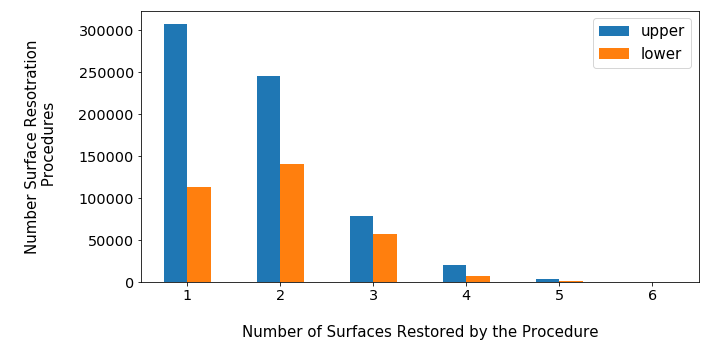

In [130]:
ax = df_surface_counts.plot.bar(figsize=(10,5))

# configure labels
ax.set_ylabel("\nNumber Surface Resotration\n Procedures\n", fontsize=15)
ax.set_xlabel("\nNumber of Surfaces Restored by the Procedure", fontsize=15)
ax.tick_params(labelsize='x-large')

# rotate the ticks on the x axis
plt.xticks(rotation=0)

plt.legend(loc='upper right', prop={'size': 15})
plt.show()

In [131]:
left_surface_counts = left_surfaces.set_index('tooth_num').sum().to_frame(name='left')
right_surface_counts = right_surfaces.set_index('tooth_num').sum().to_frame(name='right')

In [132]:
df_surface_counts = \
    functools.reduce(join_dfs, 
                     [left_surface_counts, right_surface_counts])

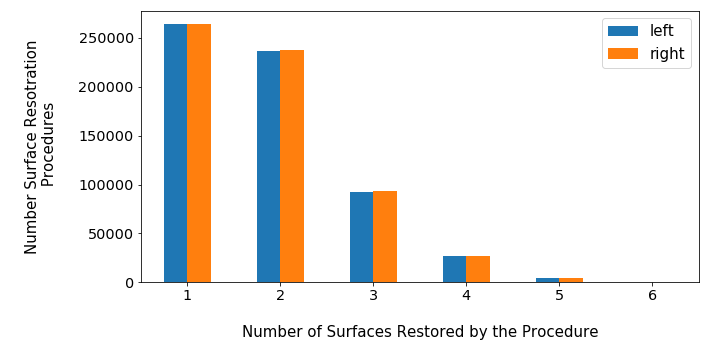

In [133]:
ax = df_surface_counts.plot.bar(figsize=(10,5))

# configure labels
ax.set_ylabel("\nNumber Surface Resotration\n Procedures\n", fontsize=15)
ax.set_xlabel("\nNumber of Surfaces Restored by the Procedure", fontsize=15)
ax.tick_params(labelsize='x-large')

# rotate the ticks on the x axis
plt.xticks(rotation=0)

plt.legend(loc='upper right', prop={'size': 15})
plt.show()

In [ ]:
df_fillings.head() 

In [ ]:
df_fillings.tooth_num = df_fillings.tooth_num.astype(int)
temp = pds.merge(df_fillings, tooth_info, left_on='tooth_num', right_on='tooth', how='left')

In [ ]:
temp